<a href="https://colab.research.google.com/github/ManasviAtGitHub/pytorch_deep_learning/blob/main/PyTorch_03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network classificaiton with PyTorch


### Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles
n_samples = 10000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [3]:
len(X), len(y)

(10000, 10000)

In [4]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]
First 5 samples of y: 
 [1 0 0 0 0]


In [5]:
# make data frame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0], "X2": X[:,1], "label":y})
circles.head(10)

,X1,X2,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
5,-0.133929,0.776249,1
6,0.779197,0.645811,0
7,0.722955,0.173831,1
8,-0.121807,0.796951,1
9,0.849529,0.505678,0


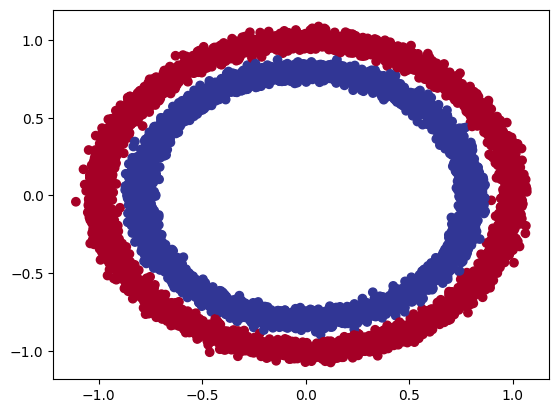

In [6]:
## Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y = X[:,1], c=y, cmap=plt.cm.RdYlBu)

### Check Input and output shape

In [7]:
X.shape, y.shape # X is represent by two numbers

((10000, 2), (10000,))

In [8]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X: [0.0464692  0.82477834] and the same for y:1
Shapes for one sample of X: (2,) and the same for y:()


### Turn data into tensors and create train and test splits

In [9]:
import torch
torch.__version__

'2.0.1+cu118'

In [10]:
type(X)

numpy.ndarray

In [11]:
# turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.0465,  0.8248],
         [ 1.0051, -0.4334],
         [-0.5835,  0.7945],
         [ 0.9848, -0.3252],
         [ 0.8299, -0.5472]]),
 tensor([1., 0., 0., 0., 0.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

### Building a model

1. Setup device agonistoc code so our code will run on the GPU if available
2. Construct a model
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
# import PyTorch and nn
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [16]:
# construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 numbers
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and outputs 1 number

  # define a forward() method that outline the forward pass

  def forward(self, x):
    return self.layer_2(self.layer_(x)) # x -> layer_1 -> layer_2 -> output


model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:

# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3310,  0.2612],
                      [ 0.3902, -0.3991],
                      [-0.6650, -0.0998],
                      [-0.6618,  0.6262],
                      [ 0.4816, -0.1143]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2894, -0.3194,  0.5818,  0.4458, -0.5113], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4438, -0.0474, -0.0225,  0.0189,  0.2985]], device='cuda:0')),
             ('1.bias', tensor([0.4314], device='cuda:0'))])

In [20]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 2000, Shape: torch.Size([2000, 1])
Length of test samples: 2000, Shape: torch.Size([2000, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])


### Setup loss function

* We'll use the torch.nn.BCEWithLogitsLoss()

In [21]:
## loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [22]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### Train model
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

**Going from raw logits -> prediction probabilities -> prediction labels**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g classification and softmax for multiclass classification)

Then we convert them to **prediction labels** by rounding them or taking the argmax()

In [23]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[0.1800],
        [0.3781],
        [0.7114],
        [0.6128],
        [0.1383]], device='cuda:0')

In [24]:
y_test[:5]

tensor([1., 1., 0., 1., 0.])

In [25]:
# use the sigmoid activation function on our model logits to turn into probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5449],
        [0.5934],
        [0.6707],
        [0.6486],
        [0.5345]], device='cuda:0')

In [26]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)

In [27]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# logits -> prob -> label
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

**Building a training and testing loop**

In [28]:
torch.manual_seed(42)

# set the number of epochs
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop
for epoch in range(epochs):

  ## training
  model_0.train()

  # forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train) # we BCEWithLogitsLoss expects raw logits, also there is BCELoss () which expects probabilities (pass through sigmoid and then call loss)

  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  ## testing
  model_0.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # pring out what's happening
  if epoch%10 == 0:
    print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch:0 | Loss: 0.71897, Acc: 50.16% | Test loss: 0.71820, Test acc: 49.35%
Epoch:10 | Loss: 0.70695, Acc: 58.96% | Test loss: 0.70624, Test acc: 58.35%
Epoch:20 | Loss: 0.70207, Acc: 52.78% | Test loss: 0.70125, Test acc: 53.15%
Epoch:30 | Loss: 0.69956, Acc: 52.08% | Test loss: 0.69871, Test acc: 52.40%
Epoch:40 | Loss: 0.69799, Acc: 51.54% | Test loss: 0.69720, Test acc: 51.90%
Epoch:50 | Loss: 0.69689, Acc: 51.34% | Test loss: 0.69619, Test acc: 51.55%
Epoch:60 | Loss: 0.69608, Acc: 51.20% | Test loss: 0.69548, Test acc: 51.15%
Epoch:70 | Loss: 0.69546, Acc: 51.31% | Test loss: 0.69498, Test acc: 51.00%
Epoch:80 | Loss: 0.69499, Acc: 51.24% | Test loss: 0.69460, Test acc: 51.10%
Epoch:90 | Loss: 0.69462, Acc: 51.34% | Test loss: 0.69433, Test acc: 51.20%


### Make predictions and evaluate the model
It's obvious that our model isn't learning anything.. let's visualize to confirm that

In [31]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

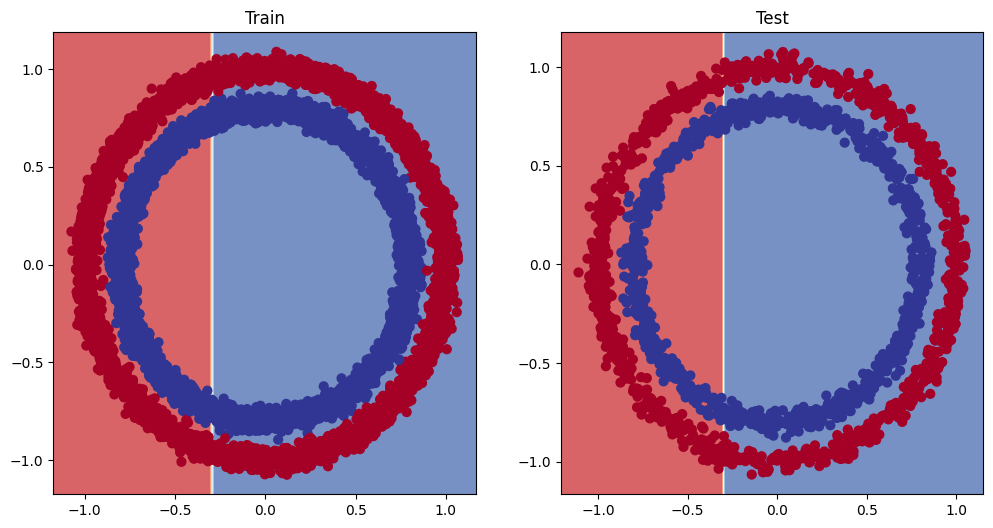

In [32]:

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Adding the missing piece : non-linearity

This will provide the necessary bend needed to fit the function to our data :)

In [34]:
type(X)

torch.Tensor

In [68]:

import torch
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.2029, -1.0081],
         [-0.1717, -0.9750],
         [ 0.5565,  0.5440],
         [ 0.1194, -1.0153],
         [ 0.3515,  0.7450]]),
 tensor([0., 0., 1., 0., 1.]))

### Building a model with non-linearity


In [69]:
from torch import nn
class CircleModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [70]:

# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### Training with non-linearity

In [39]:
len(X_test), len(y_test)

(2000, 2000)

In [55]:
X_train.device

device(type='cpu')

In [71]:
torch.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):

  ### training
  model_3.train()

  ### forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  ### calculate the loss
  loss =  loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  ### optimizer zero grad
  optimizer.zero_grad()

  ### loss backward
  loss.backward()

  ### loss backward
  optimizer.step()

  ### testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)

  # print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss : {test_loss:.4f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.6930, Acc: 50.16 | Test Loss : 0.6929, Test Acc: 49.35%
Epoch: 100 | Loss: 0.6911, Acc: 57.65 | Test Loss : 0.6909, Test Acc: 59.20%
Epoch: 200 | Loss: 0.6895, Acc: 54.59 | Test Loss : 0.6892, Test Acc: 54.95%
Epoch: 300 | Loss: 0.6874, Acc: 54.39 | Test Loss : 0.6870, Test Acc: 54.90%
Epoch: 400 | Loss: 0.6841, Acc: 54.15 | Test Loss : 0.6836, Test Acc: 54.80%
Epoch: 500 | Loss: 0.6792, Acc: 53.99 | Test Loss : 0.6787, Test Acc: 55.25%
Epoch: 600 | Loss: 0.6716, Acc: 55.10 | Test Loss : 0.6712, Test Acc: 56.90%
Epoch: 700 | Loss: 0.6612, Acc: 60.51 | Test Loss : 0.6607, Test Acc: 60.80%
Epoch: 800 | Loss: 0.6452, Acc: 67.84 | Test Loss : 0.6442, Test Acc: 68.00%
Epoch: 900 | Loss: 0.6135, Acc: 75.50 | Test Loss : 0.6121, Test Acc: 75.40%


In [111]:
X_train.shape

torch.Size([8000, 2])

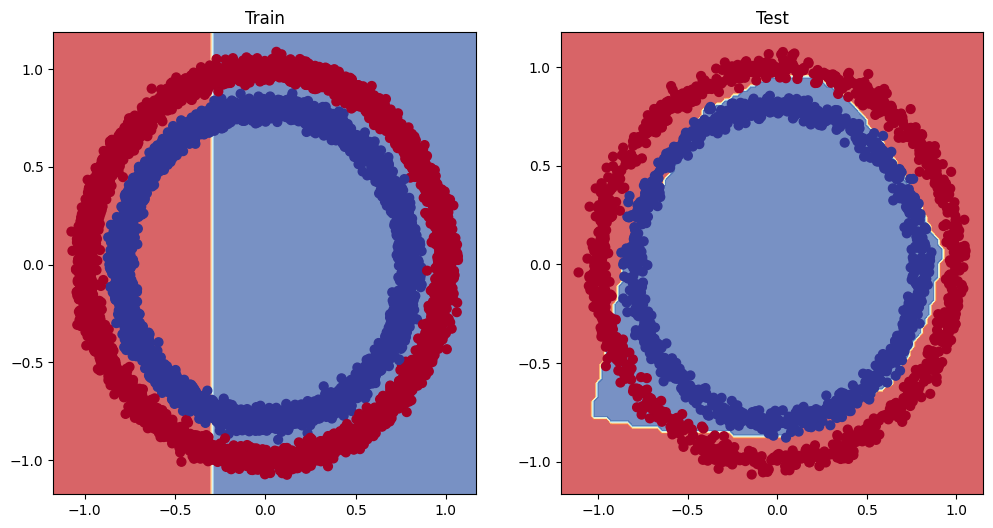

In [73]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

torch.Tensor

In [75]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test.cpu()))).squeeze()

y_preds[:10], y_test[:10]

(tensor([0., 1., 0., 1., 0., 1., 1., 1., 1., 1.]),
 tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.], device='cuda:0'))

### Putting it all together with a multi class problem

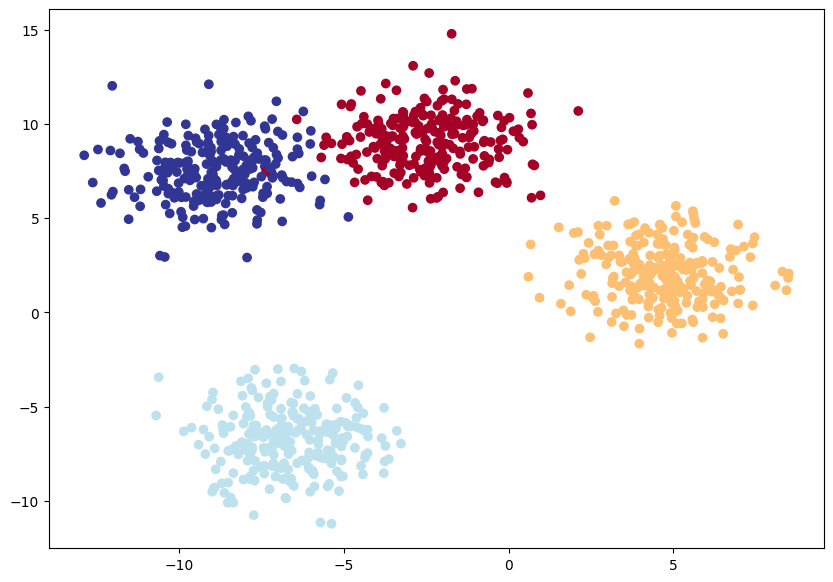

In [132]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_ClASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000, n_features= NUM_FEATURES, centers = NUM_ClASSES, cluster_std=1.5, random_state=RANDOM_SEED)

# turn data into tensors
x_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [133]:
X_blob_train = torch.tensor(X_blob_train)
X_blob_test = torch.tensor(X_blob_test)
y_blob_train = torch.tensor(y_blob_train)
y_blob_test = torch.tensor(y_blob_test)

<ipython-input-133-3b19d4f86fa1>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_blob_train = torch.tensor(X_blob_train)
<ipython-input-133-3b19d4f86fa1>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_blob_test = torch.tensor(X_blob_test)
<ipython-input-133-3b19d4f86fa1>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_blob_train = torch.tensor(y_blob_train)
<ipython-input-133-3b19d4f86fa1>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requ

In [95]:
type(X_blob_train), X_blob_train.shape

(torch.Tensor, torch.Size([800, 2]))

### Building a multiclass classification model in PyTorch

In [134]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [79]:
X_blob_train.shape, y_blob_train[:5]

((800, 2), tensor([1, 0, 2, 2, 0]))

In [80]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [135]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [120]:
type(X_blob_test), X_blob_test.shape

(torch.Tensor, torch.Size([200, 2]))

In [105]:
type(X_blob_train), X_blob_train.shape

(torch.Tensor, torch.Size([800, 2]))

In [106]:
type(y_blob_train), y_blob_train.shape

(torch.Tensor, torch.Size([800]))

In [107]:
type(y_blob_test), y_blob_test.shape

(torch.Tensor, torch.Size([200]))

In [126]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [136]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test loss: 1.0755, Test acc: 48.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test loss: 0.6607, Test acc: 97.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test loss: 0.4307, Test acc: 100.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test loss: 0.2451, Test acc: 99.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test loss: 0.1023, Test acc: 99.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test loss: 0.0585, Test acc: 99.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test loss: 0.0429, Test acc: 99.50%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test loss: 0.0349, Test acc: 99.50%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test loss: 0.0299, Test acc: 99.50%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test loss: 0.0266, Test acc: 99.50%


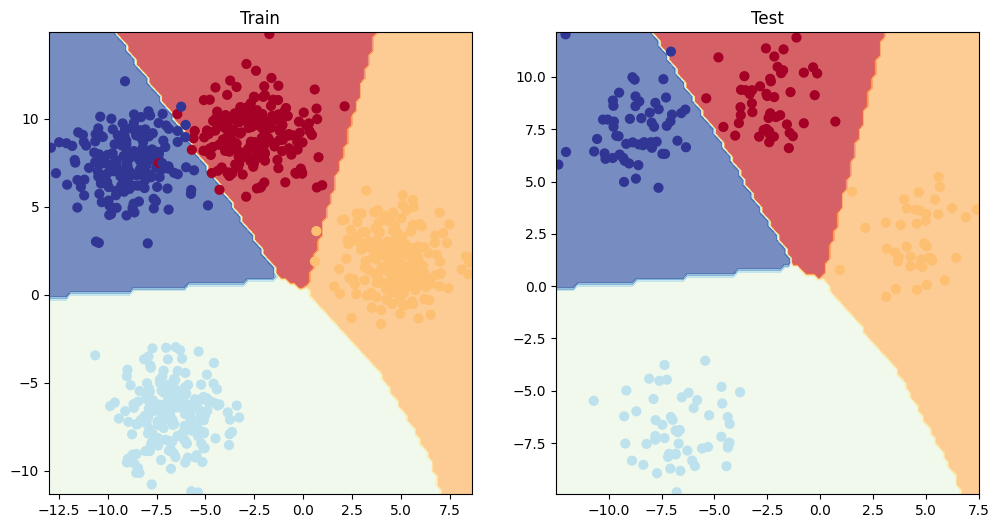

In [137]:


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)